In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [59]:
#@title Pré-definidos no Datacamp

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [60]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0


#A time-on-website analog

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

Since you will be using your draw_perm_reps() function in this exercise, it may be useful to remind yourself of its call signature: draw_perm_reps(d1, d2, func, size=1) or even referring back to the chapter 3 exercise in which you defined it.

In [61]:
#@title Pré-definidos no Datacamp

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

nht_dead = np.array([-1,894,10,130,1,934,29,6,485,254,372,81,191,355,180,286,47,269,361,173,246,492,462,1319,58,297,31,2970,640,237,434,570,77,271,563,3365,89,0,379,221,479,367,628,843,1613,1101,215,684,814,278,324,161,219,545,715,966,624,29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104,123,251,93,188,983,166,96,702,23,524,26,299,59,39,12,2,308,1114,813,887])
nht_live = np.array([645,2088,42,2090,11,886,1665,1084,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127,2147,211,41,1575,151,479,697,557,2267,542,392,73,603,233,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717,224,219,1531,498,44,288,267,600,52,269,1086,386,176,2199,216,54,675,1243,463,650,171,327,110,774,509,8,197,136,12,1124,64,380,811,232,192,731,715,226,605,539,1491,323,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149,576,445,180,1403,252,675,1351,2983,1568,45,899,3260,1025,31,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660,242,577,179,157,192,192,1848,792,1693,55,388,225,1134,1172,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491,580,2072,6450,578,745,1075,1103,1549,1520,138,1202,296,277,351,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162,1027,783,326,101,876,381,905,156,419,239,119,129,467])

In [62]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,
                                 diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


#Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function pearson_r() that you wrote in the prequel to this course for computing the Pearson correlation coefficient is already in your name space.

In [63]:
#@title Pré-definidos no Datacamp
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

illiteracy = np.array([9.5,49.2,1.0,11.200000000000003,9.799999999999997,60.0,50.2,51.2,0.5999999999999943,1.0,8.5,6.099999999999994,9.799999999999997,1.0,42.2,77.2,18.700000000000003,22.799999999999997,8.5,43.9,1.0,1.0,1.5,10.799999999999997,11.900000000000006,3.4000000000000057,0.4000000000000057,3.0999999999999943,6.599999999999994,33.7,40.4,2.299999999999997,17.200000000000003,0.7000000000000028,36.1,1.0,33.2,55.9,30.799999999999997,87.4,15.400000000000006,54.6,5.099999999999994,1.0999999999999943,10.200000000000003,19.799999999999997,0.0,40.7,57.2,59.9,3.0999999999999943,55.7,22.799999999999997,10.900000000000006,34.7,32.2,43.0,1.2999999999999972,1.0,0.5,78.4,34.2,84.9,29.099999999999994,31.299999999999997,18.299999999999997,81.8,39.0,11.200000000000003,67.0,4.099999999999994,0.20000000000000284,78.1,1.0,7.099999999999994,1.0,29.0,1.0999999999999943,11.700000000000003,73.6,33.900000000000006,14.0,0.29999999999999716,1.0,0.7999999999999972,71.9,40.1,1.0,2.0999999999999943,3.799999999999997,16.5,4.099999999999994,0.5,44.4,46.3,18.700000000000003,6.5,36.8,18.599999999999994,11.099999999999994,22.099999999999994,71.1,1.0,0.0,0.9000000000000057,0.7000000000000028,45.5,8.400000000000006,0.0,3.799999999999997,8.5,2.0,1.0,58.9,0.29999999999999716,1.0,14.0,47.0,4.099999999999994,2.200000000000003,7.200000000000003,0.29999999999999716,1.5,50.5,1.2999999999999972,0.5999999999999943,19.099999999999994,6.900000000000006,9.200000000000003,2.200000000000003,0.20000000000000284,12.299999999999997,4.900000000000006,4.599999999999994,0.29999999999999716,16.5,65.7,63.5,16.799999999999997,0.20000000000000284,1.7999999999999972,9.599999999999994,15.200000000000003,14.400000000000006,3.299999999999997,10.599999999999994,61.3,10.900000000000006,32.2,9.299999999999997,11.599999999999994,20.700000000000003,6.5,6.700000000000003,3.5,1.0,1.5999999999999943,20.5,1.5,16.700000000000003,2.0,0.9000000000000057])
fertility = np.array([1.7690000000000001,2.682,2.077,2.1319999999999997,1.827,3.872,2.2880000000000003,5.172999999999999,1.393,1.262,2.156,3.0260000000000002,2.033,1.324,2.8160000000000003,5.211,2.1,1.781,1.8219999999999998,5.9079999999999995,1.881,1.8519999999999999,1.39,2.281,2.505,1.224,1.361,1.4680000000000002,2.404,5.52,4.058,2.2230000000000003,4.859,1.2670000000000001,2.342,1.579,6.254,2.334,3.9610000000000003,6.505,2.53,2.823,2.498,2.248,2.508,3.04,1.854,4.22,5.1,4.967,1.325,4.513999999999999,3.173,2.3080000000000003,4.62,4.541,5.6370000000000005,1.926,1.7469999999999999,2.294,5.841,5.455,7.069,2.859,4.018,2.513,5.405,5.737,3.363,4.89,1.385,1.505,6.081,1.784,1.3780000000000001,1.45,1.841,1.37,2.612,5.329,5.33,3.3710000000000004,1.281,1.871,2.153,5.377999999999999,4.45,1.46,1.436,1.6119999999999999,3.19,2.752,3.35,4.01,4.166,2.642,2.977,3.415,2.295,3.0189999999999997,2.6830000000000003,5.165,1.849,1.8359999999999999,2.5180000000000002,2.43,4.5280000000000005,1.263,1.885,1.943,1.899,1.442,1.953,4.697,1.5819999999999999,2.025,1.841,5.011,1.212,1.5019999999999998,2.516,1.367,2.089,4.388,1.854,1.7480000000000002,2.978,2.1519999999999997,2.362,1.9880000000000002,1.426,3.29,3.264,1.436,1.393,2.822,4.968999999999999,5.659,3.24,1.693,1.6469999999999998,2.36,1.7919999999999998,3.45,1.516,2.233,2.563,5.2829999999999995,3.885,0.966,2.373,2.6630000000000003,1.251,2.052,3.3710000000000004,2.093,2.0,3.883,3.852,3.718,1.732,3.928])

In [64]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


#Do neonicotinoid insecticides have unintended consequences?

As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

In [65]:
#@title Pré-definidos no Datacamp

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

control = np.array([4.159234,4.408002,0.172812,3.498278,3.104912,5.164174,6.6152619999999995,4.633066,0.170408,2.65,0.0875,1.997148,6.92668,4.5749319999999996,3.896466,5.209814,3.70625,0.0,4.62545,3.01444,0.7326520000000001,0.4,6.518382,5.225,6.218742,6.840358,1.211308,0.368252,3.5993699999999995,4.2121580000000005,6.052364,2.115532,6.6041300000000005,5.26074,6.05695,6.481172,3.171522,3.057228,0.218808,5.215112,4.465168,2.2890900000000003,3.7325720000000002,2.17087,1.834326,6.074862,5.841978,8.524892,4.698492,2.965624,2.324206,3.409412,4.830726,0.1,0.0,4.101432,3.478162,1.009688,4.999296,4.32196,0.299592,3.606032,7.540260000000001,4.284024,0.057494,6.036668,2.924084,4.150144,1.256926,4.6665019999999995,4.8065940000000005,2.52478,2.027654,2.52283,4.735598,2.033236,0.0,6.177294,2.601834,3.5444080000000002,3.6045,5.520346,4.80698,3.002478,3.5598160000000005,7.075844,10.0,0.139772,6.17171,3.201232,8.459546000000001,0.17857,7.088276,5.496662000000001,5.415086,1.932282,3.02838,7.47996,1.8625900000000002,7.8384979999999995,2.242718,3.292958,6.363644,4.386898,8.47533,4.156304,1.463956,4.533628,5.5739220000000005,1.29454,7.547503999999999,3.92466,5.820258,4.1185220000000005,4.125,2.286698,0.591882,1.273124,0.0,0.0,0.0,12.225019999999999,7.601603999999999,5.56798,1.679914,8.77096,5.823942,0.258374,0.0,5.899236,5.486354,2.0531479999999998,3.25541,2.7256400000000003,3.3640660000000002,2.43427,5.282548,3.9636660000000004,0.24850999999999998,0.347916,4.046862,5.461436,4.066104,0.0,0.065])
treated = np.array([1.342686,1.058476,3.7937839999999996,0.40428000000000003,4.528388,2.142966,3.9377419999999996,0.1375,6.919164,0.0,3.5978120000000002,5.196537999999999,2.78955,2.3229,1.0906360000000002,5.3239160000000005,1.0216180000000001,0.9318360000000001,2.78,0.41220200000000007,1.180934,2.8674,0.0,0.064354,3.008348,0.876634,0.0,4.971712,7.280658,4.79732,2.084956,3.251514,1.9405,1.566192,0.58894,5.219658,0.9779760000000001,3.124584,1.297564,1.4333280000000002,4.24337,0.880964,2.376566,3.7636580000000004,1.9184259999999997,3.74,3.8417260000000004,4.6996400000000005,4.386876,0.0,1.127432,1.845452,0.690314,4.185601999999999,2.284732,7.2375940000000005,2.185148,2.799124,3.4321800000000002,0.63354,1.142496,0.586,2.3728580000000004,1.8003200000000001,3.329306,4.028804,3.474156,7.508752,2.032824,1.3365559999999999,1.906496,1.396046,2.488104,4.759114,1.07853,3.1992700000000003,3.8142519999999998,4.275962,2.817056,0.552198,3.2719400000000003,5.11525,2.064628,0.0,3.34101,6.177322,0.0,3.66415,2.352582,1.531696])

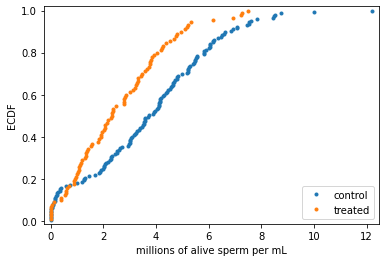

In [66]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

#Bootstrap hypothesis test on bee sperm counts

Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

For your reference, the call signature for the draw_bs_reps() function you wrote in chapter 2 is draw_bs_reps(data, func, size=1).

In [67]:
#@title Pré-definidos no Datacamp

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
 
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
 
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
 
    return bs_replicates

In [68]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0
